In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [2]:
max_features = 10000  
maxlen = 500  
batch_size = 32

print('Завантаження даних...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'тренувальних послідовностей')
print(len(input_test), 'тестових послідовностей')

print('Паддінг послідовностей (зразки до однакової довжини)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Завантаження даних...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
25000 тренувальних послідовностей
25000 тестових послідовностей
Паддінг послідовностей (зразки до однакової довжини)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - acc: 0.5528 - loss: 0.6784 - val_acc: 0.7456 - val_loss: 0.5278
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - acc: 0.8025 - loss: 0.4488 - val_acc: 0.7784 - val_loss: 0.4751
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - acc: 0.8492 - loss: 0.3587 - val_acc: 0.8290 - val_loss: 0.3920
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - acc: 0.8932 - loss: 0.2711 - val_acc: 0.8268 - val_loss: 0.4063
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - acc: 0.9258 - loss: 0.2048 - val_acc: 0.8272 - val_loss: 0.4206
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - acc: 0.9506 - loss: 0.1382 - val_acc: 0.8386 - val_loss: 0.4146
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - acc: 0.9675 - loss: 0.0987 - val_acc: 0.8062 - val_loss: 0.5423
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - acc: 0.9789 - loss: 0.0691 - val_acc: 0.8508 - val_loss: 0.5261
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 

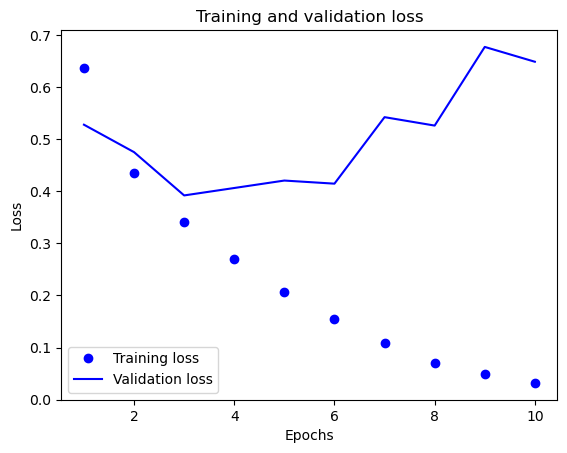

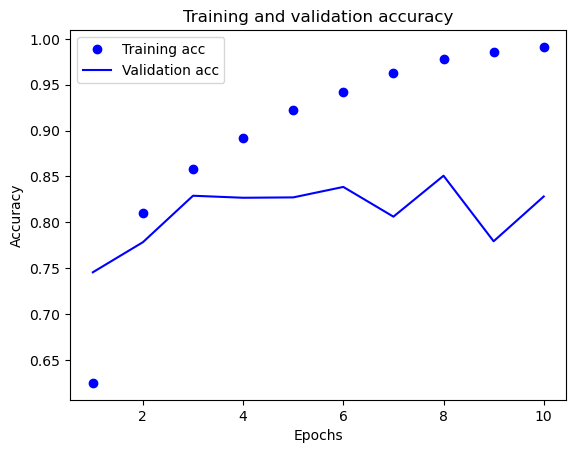

In [5]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [6]:
final_loss, final_accuracy = model.evaluate(input_test, y_test)
print("Final Test Loss:", final_loss)
print("Final Test Accuracy:", final_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.8292 - loss: 0.6507
Final Test Loss: 0.642524778842926
Final Test Accuracy: 0.8286799788475037
